In [1]:
import pandas as pd

In [2]:
housing_data = pd.read_csv("data/housing.csv")

In [3]:
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EED541E788>,
      dtype=object)

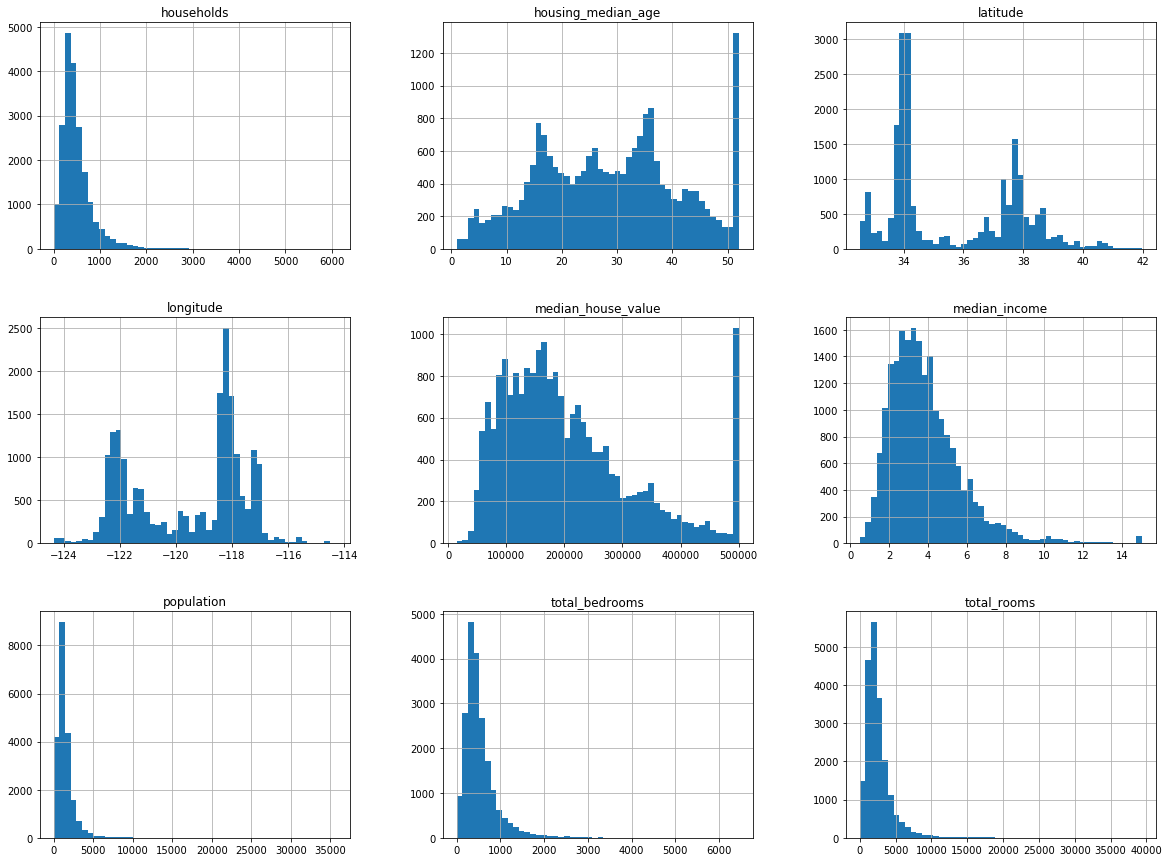

In [7]:
#内嵌绘图
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50,figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EED541E688>,
      dtype=object)

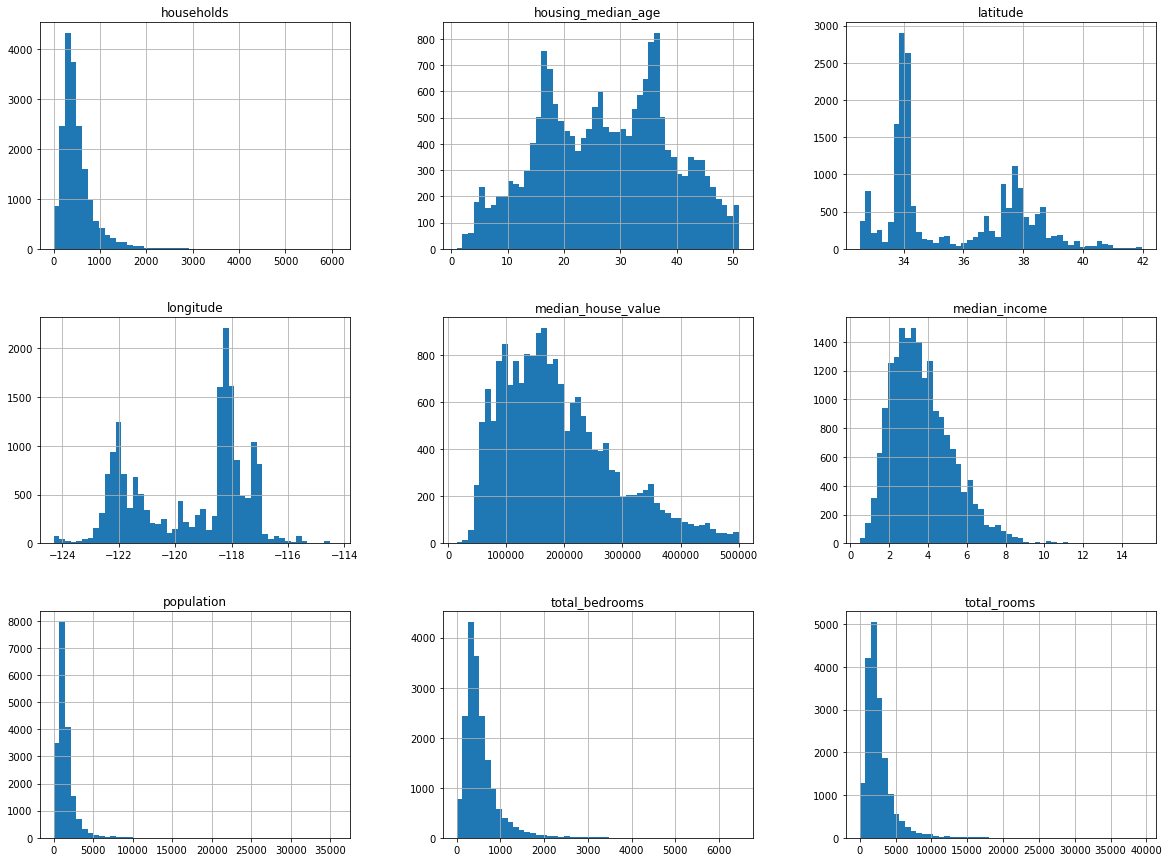

In [8]:
# remove these data limitations to reduce their impact on the trained model
housing_data = housing_data[housing_data["housing_median_age"] != 52]
housing_data = housing_data[housing_data["median_house_value"] != 500001]
housing_data.hist(bins=50, figsize=(20,15))

In [9]:
import numpy as np

In [10]:
# define a new function for splitting the data
#permutation不直接在原来的数组上进行操作，而是返回一个新的打乱顺序的数组，并不改变原来的数组。
#Purely integer-location based indexing for selection by position.
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

a[start:stop]  # items start through stop-1
a[start:]      # items start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array

In [11]:
np.random.seed(42)
train_set,test_set = split_train_test(housing_data,0.2)
print(len(train_set),"training records and",len(test_set),"testing records")

14858 training records and 3714 testing records


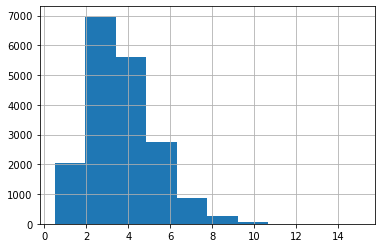

In [12]:
housing_data["median_income"].hist()

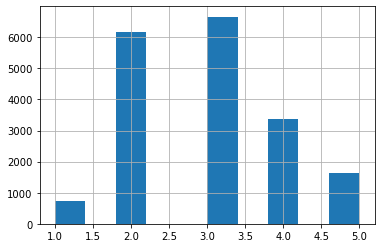

In [13]:
housing_data["income_cat"]=np.ceil(housing_data["median_income"]/1.5)
housing_data["income_cat"].where(housing_data["income_cat"]<5,5.0,inplace=True)
housing_data["income_cat"].value_counts()
housing_data["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set = housing_data.iloc[train_index]
    strat_test_set = housing_data.iloc[test_index]
strat_train_set["income_cat"].value_counts()/len(strat_train_set)
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.358546
2.0    0.331898
4.0    0.181696
5.0    0.088291
1.0    0.039569
Name: income_cat, dtype: float64

In [15]:
housing_data["income_cat"].value_counts()/len(housing_data)
train_set, test_set = split_train_test(housing_data, 0.2)
test_set["income_cat"].value_counts()/len(test_set)

3.0    0.350296
2.0    0.337911
4.0    0.179591
5.0    0.091546
1.0    0.040657
Name: income_cat, dtype: float64

In [16]:
for _set in (strat_train_set, strat_test_set):
    _set.drop("income_cat",axis=1, inplace=True)

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


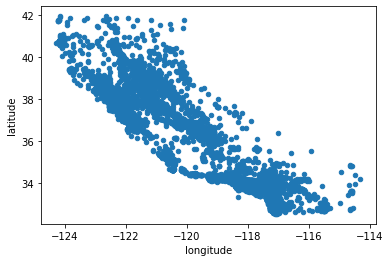

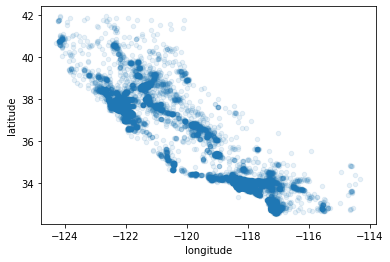

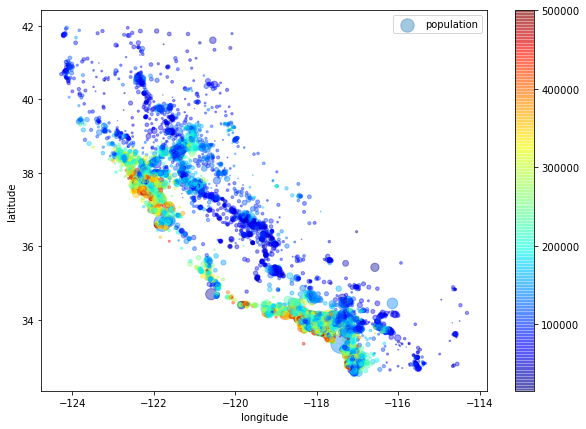

In [17]:
explore_data = strat_train_set.copy()
explore_data.plot(kind="scatter", x="longitude", y="latitude")
explore_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
explore_data.plot(kind="scatter", x="longitude", y="latitude", alpha= 0.4,
s=explore_data["population"]/100, label="population",
c=explore_data["median_house_value"], cmap=plt.get_cmap("jet"), colorbar = True,
figsize=(10,7), sharex=False)

In [18]:
train_set = strat_train_set.copy()
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.658593
total_rooms           0.155961
households            0.104927
total_bedrooms        0.084128
population            0.026246
housing_median_age    0.017206
longitude            -0.018351
latitude             -0.174677
Name: median_house_value, dtype: float64

median_house_value          1.000000
median_income               0.658593
total_rooms                 0.155961
rooms_per_household         0.113624
households                  0.104927
total_bedrooms              0.084128
population                  0.026246
housing_median_age          0.017206
longitude                  -0.018351
population_per_household   -0.018822
latitude                   -0.174677
bedrooms_per_room          -0.224336
Name: median_house_value, dtype: float64

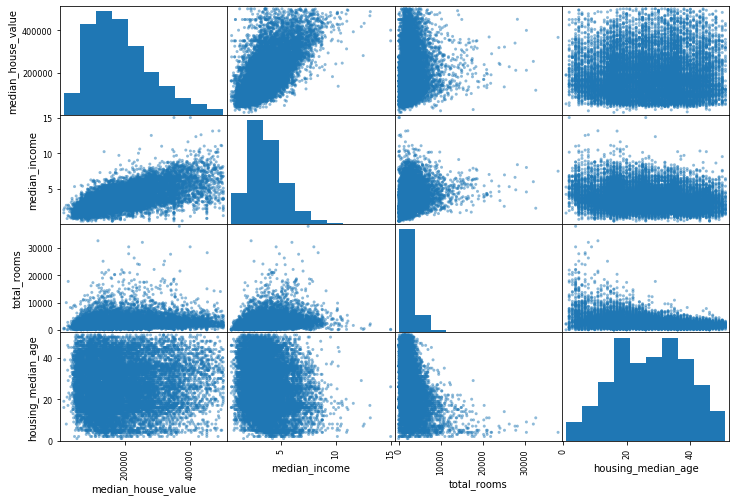

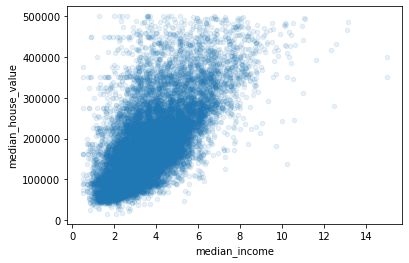

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(train_set[attributes],figsize=(12,8))
train_set.plot(kind="scatter", x= "median_income", y="median_house_value", alpha=0.1)
train_set["rooms_per_household"] = train_set["total_rooms"] / train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"] / train_set["total_rooms"]
train_set["population_per_household"] = train_set["population"] / train_set["households"]
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 13237 to 10237
Data columns (total 13 columns):
longitude                   14857 non-null float64
latitude                    14857 non-null float64
housing_median_age          14857 non-null float64
total_rooms                 14857 non-null float64
total_bedrooms              14710 non-null float64
population                  14857 non-null float64
households                  14857 non-null float64
median_income               14857 non-null float64
median_house_value          14857 non-null float64
ocean_proximity             14857 non-null object
rooms_per_household         14857 non-null float64
bedrooms_per_room           14710 non-null float64
population_per_household    14857 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.6+ MB


In [21]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
sample_incomplete_rows
median_total_bedrooms = train_set["total_bedrooms"].median()
train_set["total_bedrooms"].fillna(median_total_bedrooms,inplace=True)
median_bedrooms_per_room = train_set["bedrooms_per_room"].median()
train_set["bedrooms_per_room"].fillna(median_bedrooms_per_room,inplace=True)

In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 13237 to 10237
Data columns (total 13 columns):
longitude                   14857 non-null float64
latitude                    14857 non-null float64
housing_median_age          14857 non-null float64
total_rooms                 14857 non-null float64
total_bedrooms              14857 non-null float64
population                  14857 non-null float64
households                  14857 non-null float64
median_income               14857 non-null float64
median_house_value          14857 non-null float64
ocean_proximity             14857 non-null object
rooms_per_household         14857 non-null float64
bedrooms_per_room           14857 non-null float64
population_per_household    14857 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.6+ MB


In [23]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [24]:
median_total_bedrooms = train_set["total_bedrooms"].median()
train_set["total_bedrooms"].fillna(median_total_bedrooms,inplace=True)
median_bedrooms_per_room = train_set["bedrooms_per_room"].median()
train_set["bedrooms_per_room"].fillna(median_bedrooms_per_room,inplace=True)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 13237 to 10237
Data columns (total 13 columns):
longitude                   14857 non-null float64
latitude                    14857 non-null float64
housing_median_age          14857 non-null float64
total_rooms                 14857 non-null float64
total_bedrooms              14857 non-null float64
population                  14857 non-null float64
households                  14857 non-null float64
median_income               14857 non-null float64
median_house_value          14857 non-null float64
ocean_proximity             14857 non-null object
rooms_per_household         14857 non-null float64
bedrooms_per_room           14857 non-null float64
population_per_household    14857 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.6+ MB


In [25]:
ocean_cate = train_set["ocean_proximity"]

In [26]:
from sklearn.preprocessing import OneHotEncoder
cate_encoder = OneHotEncoder(sparse=False)
ocean_cate = ocean_cate.values.reshape(-1,1) # We need 2D matrix here
ocean_cate_1hot = cate_encoder.fit_transform(ocean_cate)
ocean_cate_1hot
cate_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
train_set_label = train_set["median_house_value"].copy()
train_set = train_set.drop("median_house_value",axis=1)
train_set_num = train_set.drop("ocean_proximity", axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
train_set_num_standarized = standard_scaler.fit_transform(train_set_num)
preparedData = np.c_[train_set_num_standarized, ocean_cate_1hot]
preparedData

array([[ 0.90529833, -0.67956601, -1.65480514, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59238493, -0.71677168,  0.70560691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83464047, -0.82373799, -0.08119711, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23462558,  0.99468918, -0.34346511, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65294882, -0.7260731 ,  0.00622556, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81445251, -0.78188161, -0.95542379, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(preparedData, train_set_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error
train_predictions = lin_reg.predict(preparedData)
lin_mse = mean_squared_error(train_predictions, train_set_label)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

58495.208459323505

In [31]:
some_data = preparedData[:5]
some_data_label = train_set_label[:5]
print("Predictions:", list(lin_reg.predict(some_data)))
print("Labels:", list(some_data_label)) 

Predictions: [291007.51152519276, 167181.52663962665, 269178.293199413, 274419.5308929112, 64717.15536001802]
Labels: [345400.0, 229200.0, 267600.0, 271900.0, 105200.0]


In [32]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(preparedData, train_set_label)
train_predictions = tree_reg.predict(preparedData)
lin_mse = mean_squared_error(train_predictions, train_set_label)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, preparedData, train_set_label, scoring ="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [34]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [65789.91841261 64789.59911461 66268.62713326 62349.18147567
 59647.31820948 63008.38351364 64794.34560991 65266.25421605
 63534.0405061  64954.01823481]
Mean: 64040.16864261336
Standard deviation: 1870.128501268705


In [35]:
scores = cross_val_score(lin_reg, preparedData, train_set_label, scoring ="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [57517.13885723 60615.90629787 60150.25558987 56211.05896727
 57210.21512561 61490.04549248 60212.83060906 57901.77820045
 57702.78617527 58926.04767937]
Mean: 58793.80629944706
Standard deviation: 1650.9115732874639


In [36]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
scores = cross_val_score(forest_reg, preparedData, train_set_label, scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [46736.30241715 46771.02326055 47220.0077261  46344.28887868
 45854.76970591 48328.02609048 47399.21403425 48023.40069813
 46752.82190592 47175.89020781]
Mean: 47060.5744924973
Standard deviation: 702.680260013924


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30]}]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(preparedData, train_set_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'n_estimators': [3, 10, 30]}],
 

In [38]:
grid_search.best_params_

{'n_estimators': 30}

In [39]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

53540.474477119715 {'n_estimators': 3}
48042.121179230846 {'n_estimators': 10}
46490.10673608443 {'n_estimators': 30}


In [40]:
final_forest_model = RandomForestRegressor(n_estimators=30,random_state=42)
final_forest_model.fit(preparedData, train_set_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [41]:
test_data_label = strat_test_set["median_house_value"].copy()
test_data = strat_test_set.drop("median_house_value", axis=1)

In [42]:
def prepare_data(data_set):
    # add features
    data_set["rooms_per_household"] = data_set["total_rooms"]/data_set["households"]
    data_set["bedrooms_per_room"] = data_set["total_bedrooms"]/data_set["total_rooms"]
    data_set["population_per_household"] = data_set["population"]/data_set["households"]
    #fill missing values
    data_set["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)
    data_set["bedrooms_per_room"].fillna(median_bedrooms_per_room, inplace=True)
    # one hot encoding
    this_cat_encoder = OneHotEncoder(categories=cate_encoder.categories_, sparse=False)
    ocean_cate = data_set["ocean_proximity"].values.reshape(-1,1)
    ocean_cate_1hot = this_cat_encoder.fit_transform(ocean_cate)
    # Standardization
    data_set_num = data_set.drop("ocean_proximity", axis = 1)
    standard_scaler = StandardScaler()
    data_set_num_standarized = standard_scaler.fit_transform(data_set_num)
    prepared_data_set = np.c_[data_set_num_standarized, ocean_cate_1hot]
    return prepared_data_set

In [43]:
prepared_test_data = prepare_data(test_data)
final_model_prediction = final_forest_model.predict(prepared_test_data)
final_mse = mean_squared_error(test_data_label, final_model_prediction)
print(np.sqrt(final_mse))

66179.61009929451
